# <font color='red'>**X Education sells online courses to industry professionals**</font>

**An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.** 

**The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.** 

**Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:**

**X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Read And Understand Data

In [669]:
## Import the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [670]:
## import the Dataframe
inp = pd.read_csv('Leads.csv')
inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [671]:
## Dataframe Info() what datatypes assignied to all columns
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [672]:
## lets check target varaibale is balanced or not
inp['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

- Target Variable is balanced

In [673]:
## Describe only Numerical values in the DataFrame
inp.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- Missing values in Numerical Values will Describing the Dataframe 
     - TotalVisits
     - Page Views Per Visit
     - Asymmetrique Activity Score
     - Asymmetrique Profile Score
     

### EDA

## view all Numerical values
sns.pairplot(inp)
plt.show()

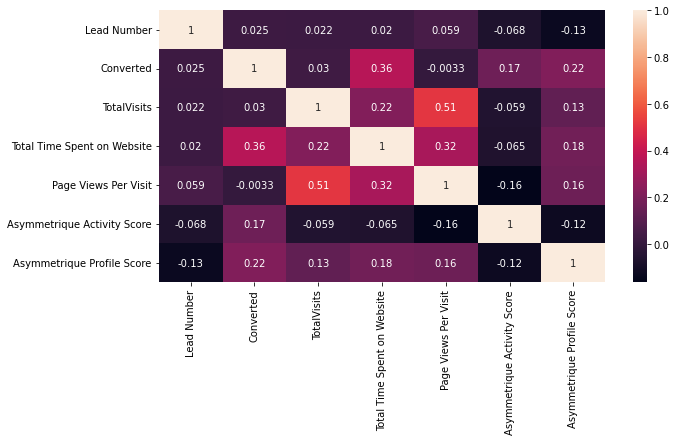

In [674]:
plt.figure(figsize=[10,5])
sns.heatmap(inp.corr(),annot=True)
plt.show()

- High correlation on the Page_views_per_visit Vs Total_visits 0.51
- Low Correlation on the Asymmetrique_Activity_Score Vs Lead_Number -0.068

In [675]:
def bar(x,y):
    sns.barplot(x,y)
    return bar

<function __main__.bar(x, y)>

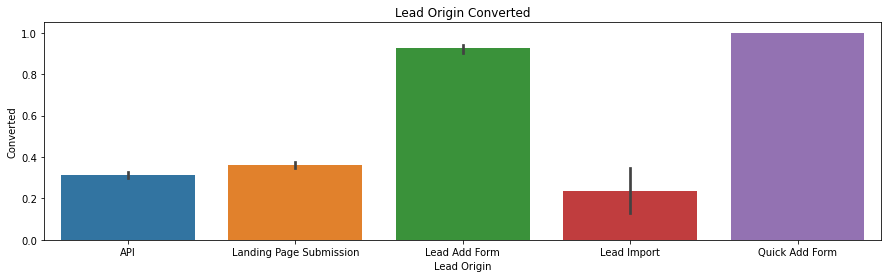

In [676]:
plt.figure(figsize=[15,4])
plt.title('Lead Origin Converted')
bar(inp['Lead Origin'],inp['Converted'])

<function __main__.bar(x, y)>

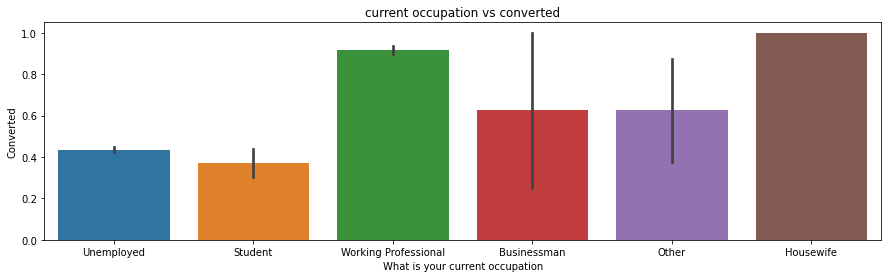

In [677]:
plt.figure(figsize=[15,4])
plt.title('current occupation vs converted')
bar(inp['What is your current occupation'],inp['Converted'])

<function __main__.bar(x, y)>

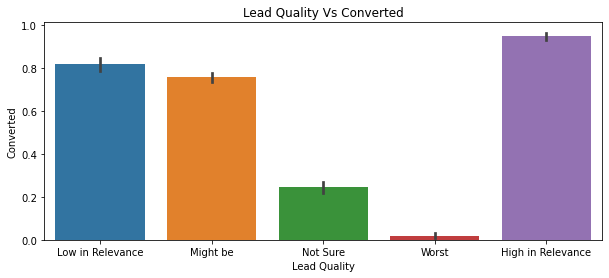

In [678]:
plt.figure(figsize=[10,4])
plt.title('Lead Quality Vs Converted')
bar(inp['Lead Quality'],inp['Converted'])

<function __main__.bar(x, y)>

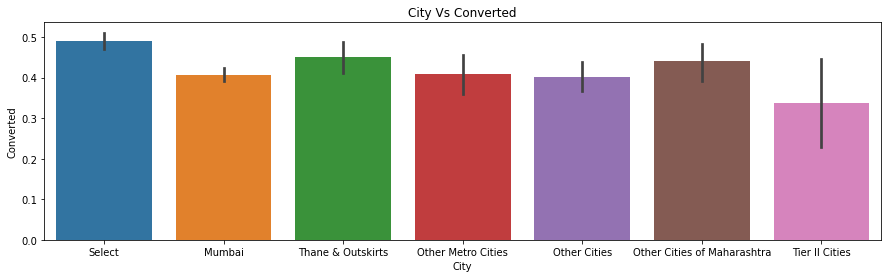

In [679]:
plt.figure(figsize=[15,4])
plt.title('City Vs Converted')
bar(inp['City'],inp['Converted'])

In [680]:
inp['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

<function __main__.bar(x, y)>

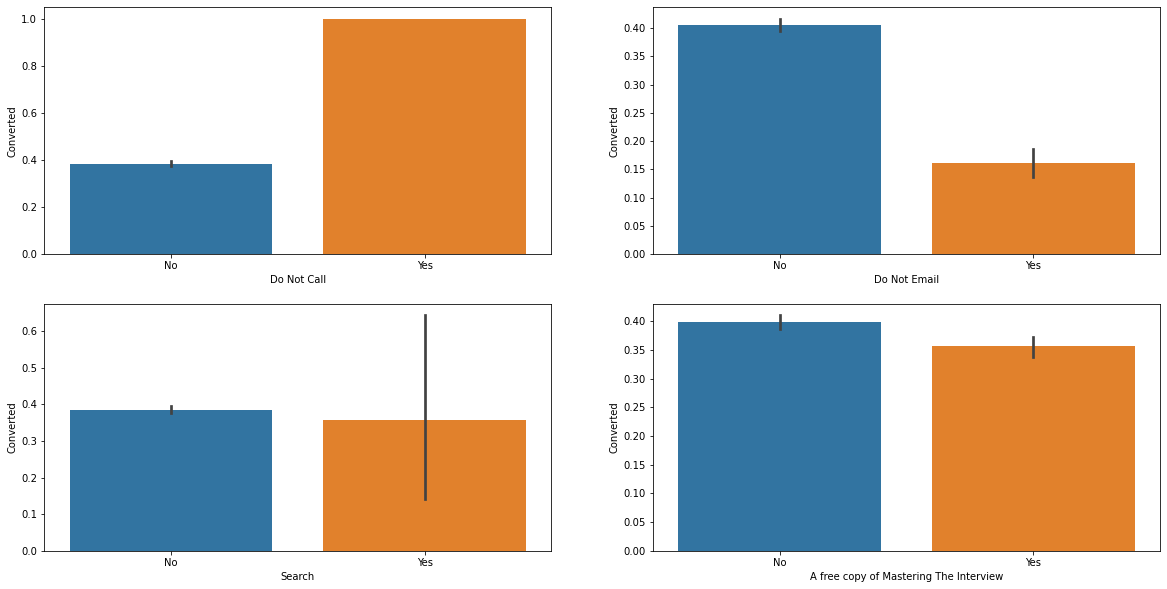

In [681]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
bar(inp['Do Not Call'],inp['Converted'])

plt.subplot(2,2,2)
bar(inp['Do Not Email'],inp['Converted'])

plt.subplot(2,2,3)
bar(inp['Search'],inp['Converted'])

plt.subplot(2,2,4)
bar(inp['A free copy of Mastering The Interview'],inp['Converted'])

### Data Preparation

In [682]:
## some columns we have select options we replace them with nan 
inp = inp.replace('Select',np.nan)

In [683]:
## lets drop the unique which has value of 1 no variation and no usefull information.
inp.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
inp.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

### Handle Missing Values

In [684]:
## check the missing values in the dataframe
inp.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [685]:
## percentage the missing values in the dataframe
round(100*(inp.isnull().sum()/len(inp.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [686]:
## less missing values in the columns of lead source drop missing 

inp= inp[~inp['Lead Source'].isnull()]
inp['Lead Source'].isnull().sum()

0

In [687]:
## dropping high %missing values whatever we do no use 
inp = inp.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','City'], axis=1)
inp.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [688]:
round(100*(inp.isnull().sum()/len(inp.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.41
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.41
Last Activity                                     1.10
Country                                          26.36
Specialization                                   36.42
What is your current occupation                  29.23
What matters most to you in choosing a course    29.43
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [689]:
inp['Country'] = inp['Country'].fillna('India')
inp['Specialization'] = inp['Specialization'].fillna('not provided')
inp['What is your current occupation'] = inp['What is your current occupation'].fillna('not provided')
inp['What matters most to you in choosing a course'] = inp['What matters most to you in choosing a course'].fillna('not provided')

In [690]:
inp1 = inp[inp.isnull().sum(axis=1)<1]
round(100*(inp1.shape[0]/inp.shape[0]),2)
inp = inp1.copy()

In [691]:
inp.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

- No Missing value We handled them Prefectly 
    - Numerical value we used imputation technique like taking mean 
    - Categorical value we took mode with most repeated value used filled with missing values

In [692]:
## convert the Yes or No values into 0 and 1
var = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
       'Through Recommendations','A free copy of Mastering The Interview']
def binary(x):
    return x.map({'Yes':1,'No':0})
inp[var] = inp[var].apply(binary)

In [693]:
## drop the Prospect ID  and Lead Number in the dataframe
inp.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [694]:
## dataframe of country there are multiple values just modifying data into two values are india and outside india 

def slots(x):
    cate = ""
    if x =='India':
        cate='India'
    else:
        cate='Outside India'
    return cate

inp['Country'] = inp.apply(lambda x: slots(x['Country']),axis=1)
inp['Country'].value_counts()

India            8787
Outside India     287
Name: Country, dtype: int64

### Dummy Coding

In [695]:
### Dummy Coding for categorical variable
var = inp[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
       'What is your current occupation','What matters most to you in choosing a course',
       'Last Notable Activity']]
stat = pd.get_dummies(var,drop_first=True)

## concat the dummy code with master dataframe
inp = pd.concat([inp,stat],1)

## drop categorical variable
inp.drop(var, axis=1, inplace=True)

### Model Building

In [696]:
## import libarary for split the train and test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(inp, train_size=0.7, random_state=100)

## shape of train and test values
print('df_train shape:',df_train.shape)
print('df_test shape:',df_test.shape)

df_train shape: (6351, 95)
df_test shape: (2723, 95)


### Scaling

In [697]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_train[var] = scaler.fit_transform(df_train[var])
df_test[var] = scaler.transform(df_test[var])

In [698]:
X_train = df_train
y_train = df_train.pop('Converted')

X_test = df_test
y_test = df_test.pop('Converted')

### 1st Training Model

In [699]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.7
Date:                Wed, 01 Nov 2023   Deviance:                       4891.3
Time:                        23:08:20   Pearson chi2:                 6.09e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      27.6087   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                                               -1.6065      0.230     -6.970      0.000      -2.058      -1.155
Do Not Call                                                                23.5192   8.74e+04      0.000      1.000   -1.71e+05    1.71e+05
TotalVisits                                                                 0.2239      0.061      3.690      0.000       0.105       0.343
Total Time Spent on Website                                                 1.1259      0.043     26.453      0.000       1.042       1.209
Page Views Per Visit                                                       -0.1679      0.055     -3.053      0.002      -0.276      -0.060
Search                                                                      0.1209      0.962      0.126      0.900      -1.765       2.007
Newspaper Article                                                          25.9456   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
X Education Forums                                                        -49.7301   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Newspaper                                                                 -26.5459   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement                                                      -0.0099      1.499     -0.007      0.995      -2.948       2.928
Through Recommendations                                                     0.7571      1.590      0.476      0.634      -2.359       3.873
A free copy of Mastering The Interview                                     -0.2027      0.113     -1.788      0.074      -0.425       0.019
Lead Origin_Landing Page Submission                                        -0.7873      0.142     -5.532      0.000      -1.066      -0.508
Lead Origin_Lead Add Form                                                  -1.0503      1.520     -0.691      0.489      -4.029       1.928
Lead Origin_Lead Import                                                    24.8924   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                                 -2.7024      1.999     -1.352      0.176      -6.620       1.215
Lead Source_Facebook                                                      -26.6870   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                                         -2.4586      1.997     -1.231      0.218      -6.372       1.455
Lea

### Feature Selection RFE

In [700]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [701]:
%%time
## import the library for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
rfe = RFE(estimator=log,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

Wall time: 11.4 s


[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Search', False, 76),
 ('Newspaper Article', False, 18),
 ('X Education Forums', False, 50),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 53),
 ('Through Recommendations', False, 61),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 72),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 2

In [702]:
## Accepted Columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not provided',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [703]:
## Rejected Columns
rej_col = X_train.columns[~rfe.support_]
rej_col

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Emai

### 2nd Model after feature selection

In [704]:
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.9
Date:                Wed, 01 Nov 2023   Deviance:                       5115.9
Time:                        23:08:32   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.2426      0.124     -1.952      0.051      -0.486       0.001
Do Not Email                                                  -1.5863      0.175     -9.081      0.000      -1.929      -1.244
Total Time Spent on Website                                    1.1171      0.041     27.347      0.000       1.037       1.197
Lead Origin_Landing Page Submission                           -1.0005      0.128     -7.794      0.000      -1.252      -0.749
Lead Origin_Lead Add Form                                      3.0738      0.234     13.156      0.000       2.616       3.532
Lead Source_Olark Chat                                         1.3109      0.125     10.523      0.000       1.067       1.555
Lead Source_Welingak Website                                   2.4834      0.755      3.289      0.001       1.004       3.963
Last Activity_Had a Phone Conversation                         1.4108      1.153      1.224      0.221      -0.848       3.670
Last Activity_Olark Chat Conversation                         -1.3103      0.168     -7.794      0.000      -1.640      -0.981
Last Activity_SMS Sent                                         1.3470      0.075     17.875      0.000       1.199       1.495
Specialization_not provided                                   -0.9348      0.126     -7.405      0.000      -1.182      -0.687
What is your current occupation_Housewife                     22.7337   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Working Professional           2.3933      0.192     12.458      0.000       2.017       2.770
What matters most to you in choosing a course_not provided    -1.2317      0.089    -13.809      0.000      -1.407      -1.057
Last Notable Activity_Had a Phone Conversation                 2.1394      1.612      1.327      0.185      -1.020       5.299
Last Notable Activity_Unreachable                              2.0375      0.499      4.084      0.000       1.060       3.015
==============================================================================================================================
"""

### VIF

In [705]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
6,Last Activity_Had a Phone Conversation,3.41
13,Last Notable Activity_Had a Phone Conversation,3.41
9,Specialization_not provided,2.22
4,Lead Source_Olark Chat,2.05
2,Lead Origin_Landing Page Submission,1.65
12,What matters most to you in choosing a course_...,1.62
3,Lead Origin_Lead Add Form,1.61
8,Last Activity_SMS Sent,1.56
7,Last Activity_Olark Chat Conversation,1.46
5,Lead Source_Welingak Website,1.37


In [706]:
## predicting values on training set
y_train_pred = res.predict(X_train_sm)
y_train_pred.values.reshape(-1)

array([0.06575077, 0.03894285, 0.61957145, ..., 0.90470811, 0.21500025,
       0.50469946])

In [707]:
## create dataframe with train values
churn = pd.DataFrame({'churn':y_train.values, 'churn_prob': y_train_pred})
churn['custID'] = y_train.index
churn['pred'] = churn['churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
churn

,churn,churn_prob,custID,pred
3009,0,0.065751,3009,0
1012,0,0.038943,1012,0
9226,0,0.619571,9226,1
4750,1,0.669955,4750,1
7987,1,0.913557,7987,1
...,...,...,...,...
367,0,0.148841,367,0
82,1,0.921926,82,1
8199,0,0.904708,8199,1
7077,0,0.215000,7077,0


### Receiver Operating Characterstics(ROC) Curve

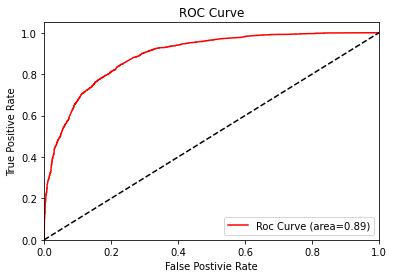

In [708]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

fpr,tpr,threshold = metrics.roc_curve(churn['churn'], churn['churn_prob'], drop_intermediate=False)
auc_score = metrics.roc_auc_score(churn['churn'], churn['churn_prob'])
plt.plot(fpr,tpr, label='Roc Curve (area=%0.2f)'%auc_score, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- **Perfect Fit Model Roc of area 0.89**

In [709]:
num = [float(i)/10 for i in range(10)] 
for i in num:
    churn[i] = churn['churn_prob'].apply(lambda x: 1 if x>i else 0)
churn

,churn,churn_prob,custID,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.065751,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.038943,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.619571,9226,1,1,1,1,1,1,1,1,0,0,0
4750,1,0.669955,4750,1,1,1,1,1,1,1,1,0,0,0
7987,1,0.913557,7987,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.148841,367,0,1,1,0,0,0,0,0,0,0,0
82,1,0.921926,82,1,1,1,1,1,1,1,1,1,1,1
8199,0,0.904708,8199,1,1,1,1,1,1,1,1,1,1,1
7077,0,0.215000,7077,0,1,1,1,0,0,0,0,0,0,0


In [710]:
## find the cutoff point 
cutoff = pd.DataFrame(columns=['Prob','Accuracy','Sensitivity','Specificity'])
num = [float(i)/10 for i in range(10)]

for i in num:
    cm = metrics.confusion_matrix(churn['churn'], churn[i])
    total = sum(sum(cm))
    accu = (cm[0,0] + cm[1,1])/total
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff.loc[i] = [i,accu,sensi,speci]
cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.593292,0.988962,0.345455
0.2,0.2,0.768068,0.919052,0.673496
0.3,0.3,0.797827,0.849141,0.765685
0.4,0.4,0.812628,0.773917,0.836876
0.5,0.5,0.816249,0.708504,0.883739
0.6,0.6,0.806487,0.636958,0.912676
0.7,0.7,0.785860,0.530662,0.945711
0.8,0.8,0.765391,0.440311,0.969014
0.9,0.9,0.718784,0.289043,0.987964


<AxesSubplot:xlabel='Prob'>

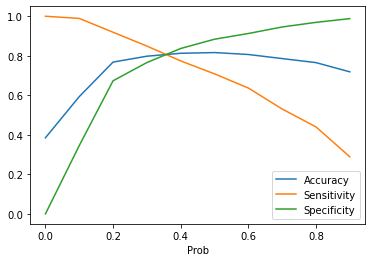

In [711]:
cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])

In [712]:
churn['final_pred'] = churn['churn_prob'].map(lambda x: 1 if x>0.35 else 0)
churn.head()

,churn,churn_prob,custID,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
3009,0,0.065751,3009,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.038943,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.619571,9226,1,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.669955,4750,1,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.913557,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [713]:
confusion = metrics.confusion_matrix(churn['churn'], churn['final_pred'])
confusion

array([[3145,  760],
       [ 484, 1962]], dtype=int64)

In [714]:
## sensitivity and specificity
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print('Sensitivity',sensitivity)
print('Specificity',specificity)

Sensitivity 0.8021259198691741
Specificity 0.8053777208706786


- sensitivity and specificity are balanced

In [715]:
### precision and recall
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

print('Precision Score:',precision_score(churn['churn'], churn['final_pred']))
print('Recall Score:',recall_score(churn['churn'], churn['final_pred']))

Precision Score: 0.7207935341660544
Recall Score: 0.8021259198691741


- precision is low compared to recall model working good

In [716]:
X_test_sm = sm.add_constant(X_test[col])
y_test_sm = res.predict(X_test_sm)
y_test_sm.values.reshape(-1)

array([0.04393519, 0.96298234, 0.03731851, ..., 0.86383247, 0.08226144,
       0.06267228])

In [717]:
churn_test = pd.DataFrame({'churn':y_test.values, 'churn_prob': y_test_sm})
churn_test['custID'] = y_test.index
churn_test['pred'] = churn_test['churn_prob'].apply(lambda x: 1 if x>0.35 else 0)
churn_test

,churn,churn_prob,custID,pred
3271,0,0.043935,3271,0
1490,1,0.962982,1490,1
7936,0,0.037319,7936,0
4216,1,0.862761,4216,1
3830,0,0.041829,3830,0
...,...,...,...,...
850,0,0.145740,850,0
2879,0,0.263358,2879,0
6501,1,0.863832,6501,1
7155,0,0.082261,7155,0


In [718]:
confusion = metrics.confusion_matrix(churn_test['churn'], churn_test['pred'])
confusion

array([[1410,  324],
       [ 192,  797]], dtype=int64)

In [719]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

print('Precision Score:',precision_score(churn_test['churn'], churn_test['pred']))
print('Recall Score:',recall_score(churn_test['churn'], churn_test['pred']))

Precision Score: 0.7109723461195361
Recall Score: 0.8058645096056622


- Test case
    - precision score is low compared to recall model stable
- we got cutoff in tpr and fpr was 0.35

### Precison and recall tradeoff

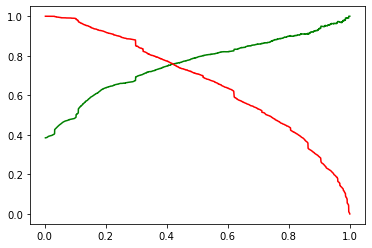

In [720]:
p,r,threshold = precision_recall_curve(churn['churn'], churn['churn_prob'])
plt.plot(threshold, p[:-1],'g-')
plt.plot(threshold, r[:-1],'r-')

- Cutoff point is 0.42

In [721]:
X_train_sm = sm.add_constant(X_train[col])
y_train_sm = res.predict(X_train_sm)
y_train_sm.values.reshape(-1)

array([0.06575077, 0.03894285, 0.61957145, ..., 0.90470811, 0.21500025,
       0.50469946])

In [722]:
churn = pd.DataFrame({'churn':y_train.values, 'churn_prob': y_train_sm})
churn['custID'] = y_train.index
churn['pred'] = churn['churn_prob'].apply(lambda x: 1 if x>0.42 else 0)
churn

,churn,churn_prob,custID,pred
3009,0,0.065751,3009,0
1012,0,0.038943,1012,0
9226,0,0.619571,9226,1
4750,1,0.669955,4750,1
7987,1,0.913557,7987,1
...,...,...,...,...
367,0,0.148841,367,0
82,1,0.921926,82,1
8199,0,0.904708,8199,1
7077,0,0.215000,7077,0


In [723]:
confusion = metrics.confusion_matrix(churn['churn'], churn['pred'])
confusion

array([[3314,  591],
       [ 591, 1855]], dtype=int64)

In [724]:
## sensitivity and specificity
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print('Sensitivity',sensitivity)
print('Specificity',specificity)

Sensitivity 0.758381030253475
Specificity 0.8486555697823304


In [725]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

print('Precision Score:',precision_score(churn['churn'], churn['pred']))
print('Recall Score:',recall_score(churn['churn'], churn['pred']))

Precision Score: 0.758381030253475
Recall Score: 0.758381030253475


### Prediction On Test Set

In [726]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred.values.reshape(-1)

array([0.04393519, 0.96298234, 0.03731851, ..., 0.86383247, 0.08226144,
       0.06267228])

In [727]:
churn_test = pd.DataFrame({'churn':y_test.values, 'churn_prod':y_test_pred})
churn_test['custID'] = y_test.index
churn_test['pred'] = churn_test['churn_prod'].apply(lambda x: 1 if x>0.41 else 0)
churn_test

,churn,churn_prod,custID,pred
3271,0,0.043935,3271,0
1490,1,0.962982,1490,1
7936,0,0.037319,7936,0
4216,1,0.862761,4216,1
3830,0,0.041829,3830,0
...,...,...,...,...
850,0,0.145740,850,0
2879,0,0.263358,2879,0
6501,1,0.863832,6501,1
7155,0,0.082261,7155,0


In [728]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

print('Precision Score:',precision_score(churn['churn'], churn['pred']))
print('Recall Score:',recall_score(churn['churn'], churn['pred']))

Precision Score: 0.758381030253475
Recall Score: 0.758381030253475


- Both Train and Test Case Handled 75%
